## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-14 | veh18.csv |
| 15-18 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number:   12
 - Group Members
     - Jonathan Alberto Calle Zuniga (0825959)
     - Jonathan Chukwuma OTEH (0775057)
     - Ali Salman (0840471)


### Part 1 - Create and evaluate an initial model

In this part you should:
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model

#### Code (15 marks)

In [ ]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=f388d372105999db910c86b9057c2a5f2154fe4cc1306902d6ca2ca3d8722020
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from rfpimp import *

In [ ]:
veh_18 = pd.read_csv("https://raw.githubusercontent.com/joncalle/ML1/main/veh18.csv")
print(veh_18.shape) # print rows, columns
veh_18.head(2).T      # dump first 2 rows

(1163, 12)


,0,1
Eng Displ,5.2,4.0
# Cyl,12,8
Comb Unadj FE - Conventional Fuel,22.8444,26.6603
# Gears,8,8
Max Ethanol % - Gasoline,10.0,10.0
Intake Valves Per Cyl,2,2
Exhaust Valves Per Cyl,2,2
Fuel Metering Sys Desc,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection
Air Aspiration Method Desc,Turbocharged,Turbocharged
Trans Desc,Semi-Automatic,Semi-Automatic


In [ ]:
#isolate all numeric features from original data set
features = ['Eng Displ', '# Cyl', 'Comb Unadj FE - Conventional Fuel', '# Gears',
       'Max Ethanol % - Gasoline', 'Intake Valves Per Cyl',
       'Exhaust Valves Per Cyl']

df_veh = veh_18[features]

In [ ]:
#verify there are no missing values
veh_18.isna().sum()

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Fuel Metering Sys Desc               0
Air Aspiration Method Desc           0
Trans Desc                           0
Cyl Deact?                           0
Var Valve Lift?                      0
dtype: int64

In [ ]:
def evaluate(X, y, runs=10, randstat = 42, size = 0.2):
    oob_scores = []
    predictions =[]
    for i in range(runs):
        model = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=randstat)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=randstat)
        model.fit(X_train, y_train)
        oob_scores.append(model.oob_score_)

    avg_oob_score = sum(oob_scores) / len(oob_scores)
    print(f"Average OOB score over {runs:.0f} runs for model: {avg_oob_score:.4f}")
    return model, avg_oob_score

In [ ]:
X, y = df_veh.drop('Comb Unadj FE - Conventional Fuel', axis = 1), df_veh['Comb Unadj FE - Conventional Fuel']
model1, oob_score1 = evaluate(X,y) #Base Model.

Average OOB score over 10 runs for model: 0.7224


#### Question (5 marks)
Explain the purpose of creating a baseline model.

A baseline model serves as a valuable reference point for assessing the performance of more intricate models in machine learning, enabling a comprehensive evaluation of the effectiveness of model enhancements. It plays a crucial role in verifying the proper preparation of data and the correctness of implementation. By establishing a baseline, any significant data issues or anomalies can be identified. In the event that the baseline model exhibits poor performance, it serves as an indicator for the need to undertake further fixes and improvements.

### Part 2 - Convert non-numeric features to numeric

In this part you should:
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features

#### Code (25 marks)

In [ ]:
features = ['Fuel Metering Sys Desc','Air Aspiration Method Desc','Trans Desc','Cyl Deact?','Var Valve Lift?']
df2 = veh_18[features]
for col in df2:
  print(df2[col].unique())

['Multipoint/sequential fuel injection' 'Spark Ignition Direct Injection'
 'Spark Ignition direct & ported injection']
['Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged']
['Semi-Automatic' 'Manual'
 'Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Automatic' 'Automated Manual' 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)']
['Y' 'N']
['N' 'Y']


In [ ]:
def converting(df, feature_name, pref):
  df[feature_name] = df[feature_name].values
  df[feature_name] = df[feature_name].replace('None or Unspecified', np.nan)
  onehot = pd.get_dummies(df[feature_name],
                        prefix=pref,
                        dtype=float)
  del df2[feature_name]
  df = pd.concat([df, onehot], axis=1)
  return df

In [ ]:
def convertingBol(df, feature_name):
  df[feature_name] = df[feature_name].map({'N':0,'Y':1})
  df[feature_name+'_cat'] = df[feature_name].astype('category').cat.codes + 1
  del df[feature_name]
  return df

In [ ]:
# Converting to categorical features
df2 = converting(df2, 'Fuel Metering Sys Desc', 'Fuel Sys')
df2 = converting(df2, 'Air Aspiration Method Desc', 'Air Asp')
df2 = converting(df2, 'Trans Desc', 'Trans Desc')

df2 = convertingBol(df2, 'Cyl Deact?')
df2 = convertingBol(df2, 'Var Valve Lift?')

# Creating a new feature by combining 2 existing
df2['Valves Per Cyl'] = veh_18['Intake Valves Per Cyl'] + veh_18['Exhaust Valves Per Cyl']

In [ ]:
df2

,Fuel Sys_Multipoint/sequential fuel injection,Fuel Sys_Spark Ignition Direct Injection,Fuel Sys_Spark Ignition direct & ported injection,Air Asp_Naturally Aspirated,Air Asp_Supercharged,Air Asp_Turbocharged,Air Asp_Turbocharged+Supercharged,Trans Desc_Automated Manual,Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles),Trans Desc_Automatic,Trans Desc_Continuously Variable,Trans Desc_Manual,Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles),Trans Desc_Semi-Automatic,Cyl Deact?_cat,Var Valve Lift?_cat,Valves Per Cyl
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,4
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,4
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,4
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,4
1159,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,4
1160,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,4
1161,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,4


In [ ]:
X2, y2 =  df2, df_veh['Comb Unadj FE - Conventional Fuel']
model2, oob_score2 = evaluate(X2, y2) #Model with categorial variables

Average OOB score over 10 runs for model: 0.4115


Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.



what we are doing|Why we are using the code|Reason
--|--|---|
Subset of the dataset|we selected five features from the dataset which are 'Fuel Metering Sys Desc', 'Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?', and 'Var Valve Lift?'and we loop to iterates the col with the unique values|These features are of interest to us
one-hot encoding|here the specified feature column in our data, replacing the original column with the encoded columns and also replacement of 'None or Unspecified' values with NaN before the encoding process| The ideal is to transform or induce the require numerical representations of categorical variables which will enable seamless integration of the features into machine learning algorithms, facilitating accurate analysis and modeling processes.
concat| This line concatenates the original DataFrame (df) with the one-hot encoded DataFrame (onehot). The concat function is used with axis=1 to concatenate the DataFrames , |We want to add the one-hot encoded columns to the original dataset column-wise
convertingBol| it enables us in the transformation of a boolean feature column into numerical representations, supplying the mapped numerical column as well as an additional categorical column with integer codes. | This is helpful When working with boolean features in various forms or when using machine learning methods task that call for numerical inputs.
X2, y2 |There is need to  separates the dataset into input features and the target variable.|Here, The column 'Comb Unadj FE - Conventional Fuel' from the DataFrame df_veh is assigned to the variable y2, representing the target variable.
The evaluate|To be able  to train a model using the provided features and target variable and obtain the trained model|To get the model to be evaluated
oob_score|we want to know the model's performance on unseen data based on samples not used during training|accuracy of the model


### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above

#### Code (15 marks)

In [ ]:
df3 = pd.concat([df_veh.drop('Comb Unadj FE - Conventional Fuel', axis = 1), df2], axis=1)
df3.columns

Index(['Eng Displ', '# Cyl', '# Gears', 'Max Ethanol % - Gasoline',
       'Intake Valves Per Cyl', 'Exhaust Valves Per Cyl',
       'Fuel Sys_Multipoint/sequential fuel injection',
       'Fuel Sys_Spark Ignition Direct Injection',
       'Fuel Sys_Spark Ignition direct & ported injection',
       'Air Asp_Naturally Aspirated', 'Air Asp_Supercharged',
       'Air Asp_Turbocharged', 'Air Asp_Turbocharged+Supercharged',
       'Trans Desc_Automated Manual',
       'Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles)',
       'Trans Desc_Automatic', 'Trans Desc_Continuously Variable',
       'Trans Desc_Manual',
       'Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles)',
       'Trans Desc_Semi-Automatic', 'Cyl Deact?_cat', 'Var Valve Lift?_cat',
       'Valves Per Cyl'],
      dtype='object')

In [ ]:
X3, y3 =  df3, df_veh['Comb Unadj FE - Conventional Fuel']
model3, oob_score3 = evaluate(X3, y3)

Average OOB score over 10 runs for model: 0.8784


### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference)
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [ ]:
print(oob_score1)
print(oob_score3)

0.7224172448368936
0.8783529577102938


In [ ]:
percent_difference = abs(oob_score1 - oob_score3) / ((oob_score1 + oob_score3) / 2) * 100
print(f"The percent difference between the results of Part 1 and Part 3 is: {percent_difference:.2f}%")

The percent difference between the results of Part 1 and Part 3 is: 19.48%


In [ ]:
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

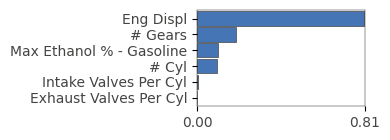

In [ ]:
# Display feature importances for Part 1
showimp(model1, X, y)

/usr/local/lib/python3.10/dist-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


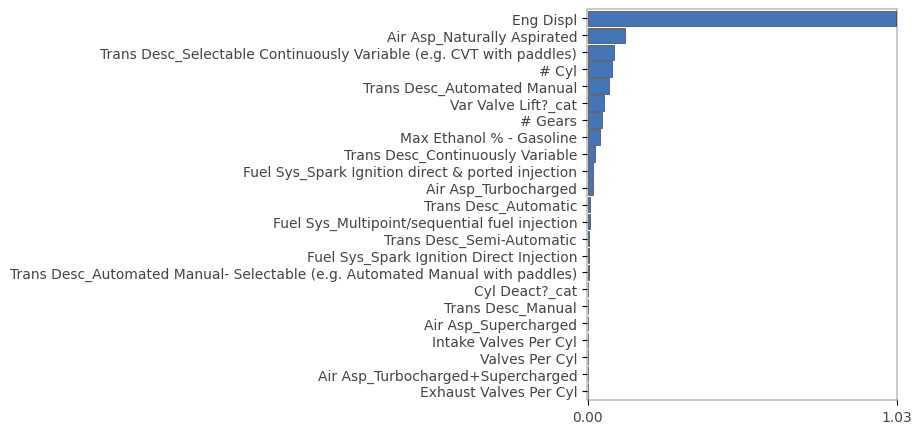

In [ ]:
# Display feature importances for Part 3
showimp(model3, X3, y3)

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed?

Features to be removed:

1. Exhaust Valves Per Cyl
2. Air Asp_Turbocharged+Supercharged
3. Air Asp_Supercharged
4. Trans Desc_Automated Manual- Selectable (e.g. Automated Manual with paddles)
5. Cyl Deact?_cat
6. Trans Desc_Manual
7. Fuel Sys_Multipoint/sequential fuel injection
8. Fuel Sys_Spark Ignition Direct Injection

These features could potentially be removed because they have low feature importances in both Part 1 and Part 3. Low feature importances indicate that these features have less impact or correlation with the target variable, 'Comb Unadj FE - Conventional Fuel'. Removing such features can simplify the model and potentially improve its performance by reducing noise or irrelevant information.


In [ ]:
final_fetures = ['Eng Displ',
                 '# Cyl',
                 '# Gears',
                 'Max Ethanol % - Gasoline',
                 'Fuel Sys_Spark Ignition direct & ported injection',
                 'Air Asp_Naturally Aspirated',
                 'Air Asp_Turbocharged',
                 'Trans Desc_Automated Manual',
                 'Trans Desc_Continuously Variable',
                 'Trans Desc_Selectable Continuously Variable (e.g. CVT with paddles)',
                 'Var Valve Lift?_cat',
                 'Trans Desc_Semi-Automatic',
                 'Trans Desc_Automatic']

X4, y4 = df3[final_fetures], df_veh['Comb Unadj FE - Conventional Fuel']
model4, oob_score4 = evaluate(X4, y4)

Average OOB score over 10 runs for model: 0.8746


/usr/local/lib/python3.10/dist-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


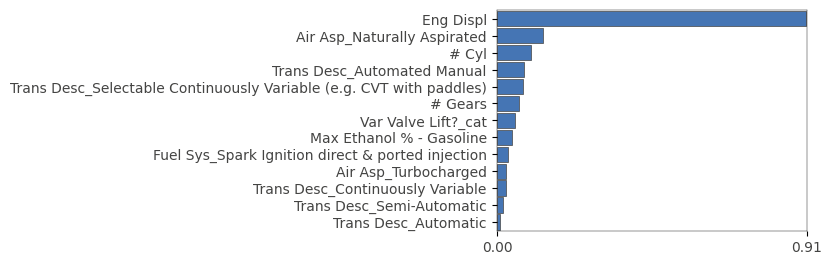

In [ ]:
showimp(model4, X4, y4)

In [ ]:
print(oob_score3)
print(oob_score4)

0.8783529577102938
0.8746041961433402


In [ ]:
percent_difference2 = abs(oob_score3 - oob_score4) / ((oob_score3 + oob_score4) / 2) * 100
print(f"The percent difference between the results of Part 3 and Part 4 is: {percent_difference2:.2f}%")

The percent difference between the results of Part 1 and Part 3 is: 0.43%
